In [1]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("./temp2_imputation.csv")

df


,broadcast_time,product_category,unit_price,handling_amount,off_day,time,weekday,hour,temperature_seoul,rain_seoul,...,pmWarning_busan,season,day_dup,week_dup,max_watching,avg_watching,working_time,buy_count,pastBuyer_count_mean,unit_price_class
0,20.0,의류,39900,2099000.0,True,06:00:00,1,6,-7.9,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,52.606516,NaN,3.0
1,20.0,의류,39900,4371000.0,True,06:00:00,1,6,-7.9,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,109.548872,NaN,3.0
2,20.0,의류,39900,6955000.0,True,06:20:00,1,6,-7.9,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,174.310777,109.548872,3.0
3,20.0,의류,39900,3262000.0,True,06:20:00,1,6,-7.9,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,81.754386,52.606516,3.0
4,20.0,의류,39900,9337000.0,True,06:40:00,1,6,-7.9,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,234.010025,141.929825,3.0
5,20.0,의류,39900,6672000.0,True,06:40:00,1,6,-7.9,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,167.218045,67.180451,3.0
6,20.0,속옷,59000,6819000.0,True,07:00:00,1,7,-7.7,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,115.576271,NaN,6.0
7,20.0,속옷,59000,15689000.0,True,07:20:00,1,7,-7.7,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,265.915254,115.576271,6.0
8,20.0,속옷,59000,25370000.0,True,07:40:00,1,7,-7.7,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,430.000000,190.745763,6.0
9,20.0,의류,59900,16133000.0,True,08:00:00,1,8,-7.7,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,269.332220,NaN,7.0


## max_watching

## avg_watching

## 1-1. K-means 클러스터링

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn


X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [53]:
print("클러스터 레이블 확인 : \n {}".format(kmeans.labels_))

클러스터 레이블 확인 : 
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [54]:
print(np.array_equal(kmeans.labels_,kmeans.predict(X)))

True


In [55]:
import matplotlib.pyplot as plt

## 1-2. 병합 클러스터링

Text(0, 0.5, 'cluster distance')

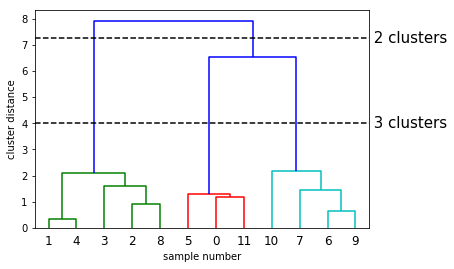

In [56]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")

## 1-3. DBSCAN

### DBSCAN(density-based spatial clustering of applications with noise) 은 아주 유용한 군집 알고리즘입니다. 번역하면 밀도 기반 클러스터링이라고 할 수 있습니다.

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


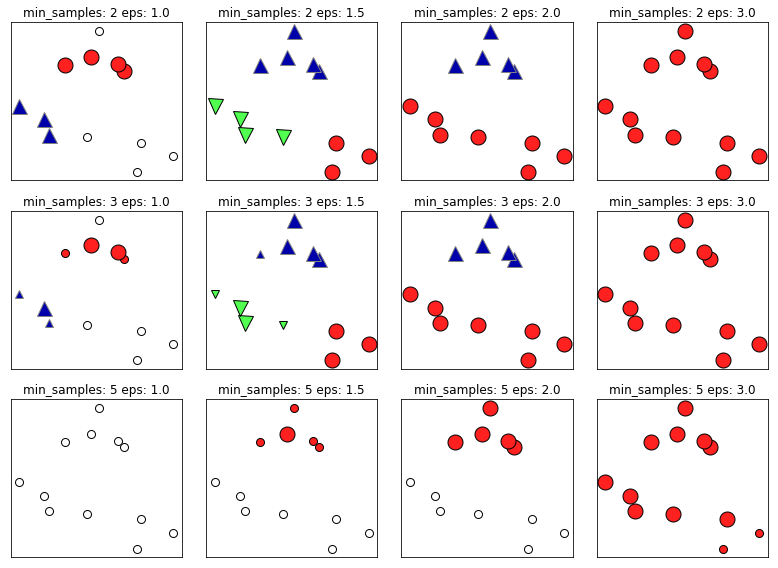

In [57]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))
# 클러스터 레이블:
# [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
# 모든 포인트에 잡음 포이인트를 의미하는 -1이 할당되었고, 이는 작은 샘플에 적합하지 않은 eps와 min_samples 기본값 때문입니다.
# 여러가지 변수 값에 대한 클러스터 할당을 체크해봅시다.
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'feature 1')

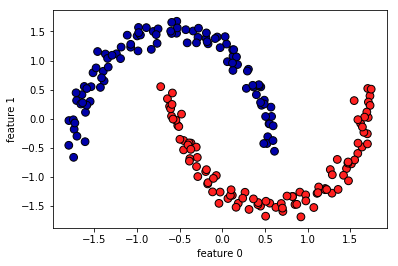

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## 1-4 클러스터링 알고리즘 비교

## 1-4.1 ARI(adjusted rand index) 와 NMI(normalized mutual information)

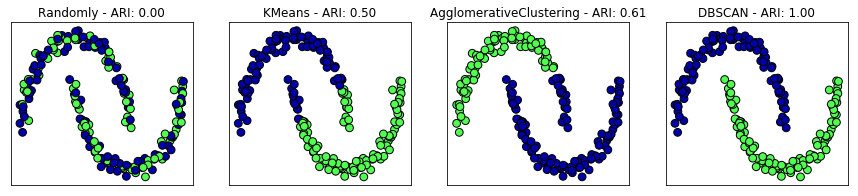

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Randomly - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,  adjusted_rand_score(y, clusters)))

## 1-4.2  실루엣 계수(silhouette coefficient)

[[ 0.81680544  0.5216447 ]
 [ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]
 [ 1.8820287  -0.04238449]
 [ 0.97481551  0.20999374]
 [ 0.88798782 -0.48936735]
 [ 0.89865156  0.36637762]
 [ 1.11638974 -0.53460385]
 [-0.36380036  0.82790185]
 [ 0.24702417 -0.23856676]
 [ 1.81658658 -0.13088387]
 [ 1.2163905  -0.40685761]
 [-0.8236696   0.64235178]
 [ 0.98065583  0.20850838]
 [ 0.54097175  0.88616823]
 [ 0.348031   -0.30101351]
 [ 0.35181497  0.88827765]
 [-0.77708642  0.82253872]
 [ 1.92590813  0.01214146]
 [ 0.86096723 -0.47653216]
 [ 0.19990695  0.99672359]
 [ 1.2895301  -0.37071087]
 [-0.27847636  1.02538452]
 [ 0.24187916 -0.07627812]
 [ 1.84988768 -0.09773674]
 [ 1.88406869  0.0449402 ]
 [ 0.165822   -0.08613126]
 [ 0.13861369  0.89639036]
 [ 0.89087024  0.52265882]
 [-0.22806587  0.84091882]
 [ 0.98279208 -0.46457771]
 [ 0.04237749  0.19457898]
 [ 0.76422612  0.67223332]
 [ 1.91108938  0.21178339]
 [ 0.43608432 -0.23007221]
 

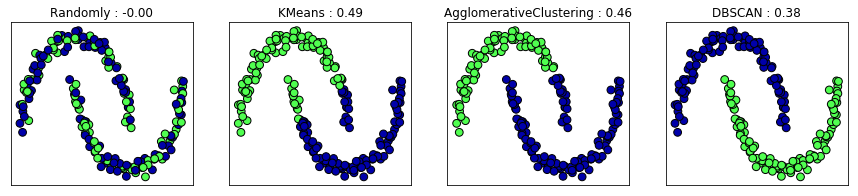

In [60]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

print(X)

print(type(X))

print(X[1])

print(y)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Randomly : {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [61]:
df

,broadcast_time,product_category,unit_price,handling_amount,off_day,time,weekday,hour,temperature_seoul,rain_seoul,...,pmWarning_busan,season,day_dup,week_dup,max_watching,avg_watching,working_time,buy_count,pastBuyer_count_mean,unit_price_class
0,20.0,의류,39900,2099000.0,True,06:00:00,1,6,-7.9,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,52.606516,NaN,3.0
1,20.0,의류,39900,4371000.0,True,06:00:00,1,6,-7.9,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,109.548872,NaN,3.0
2,20.0,의류,39900,6955000.0,True,06:20:00,1,6,-7.9,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,174.310777,109.548872,3.0
3,20.0,의류,39900,3262000.0,True,06:20:00,1,6,-7.9,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,81.754386,52.606516,3.0
4,20.0,의류,39900,9337000.0,True,06:40:00,1,6,-7.9,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,234.010025,141.929825,3.0
5,20.0,의류,39900,6672000.0,True,06:40:00,1,6,-7.9,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,167.218045,67.180451,3.0
6,20.0,속옷,59000,6819000.0,True,07:00:00,1,7,-7.7,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,115.576271,NaN,6.0
7,20.0,속옷,59000,15689000.0,True,07:20:00,1,7,-7.7,0.0,...,False,1,2.0,2.0,0.000,0.000000,False,265.915254,115.576271,6.0
8,20.0,속옷,59000,25370000.0,True,07:40:00,1,7,-7.7,0.0,...,False,1,3.0,3.0,0.000,0.000000,False,430.000000,190.745763,6.0
9,20.0,의류,59900,16133000.0,True,08:00:00,1,8,-7.7,0.0,...,False,1,1.0,1.0,0.000,0.000000,False,269.332220,NaN,7.0


In [63]:
df['hour']

0         6
1         6
2         6
3         6
4         6
5         6
6         7
7         7
8         7
9         8
10        8
11        8
12        9
13        9
14        9
15       10
16       10
17       10
18       11
19       11
20       12
21       12
22       12
23       13
24       13
25       14
26       14
27       14
28       14
29       15
         ..
35345    19
35346    20
35347    20
35348    20
35349    20
35350    20
35351    20
35352    20
35353    20
35354    20
35355    20
35356    20
35357    21
35358    21
35359    21
35360    21
35361    21
35362    21
35363    21
35364    21
35365    22
35366    22
35367    23
35368    23
35369    23
35370    23
35371    23
35372    23
35373    23
35374    23
Name: hour, Length: 35375, dtype: int64

In [64]:
df["max_watching"]

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
5        0.000
6        0.000
7        0.000
8        0.000
9        0.000
10       0.000
11       0.035
12       0.000
13       0.011
14       0.003
15       0.011
16       0.029
17       0.039
18       0.000
19       0.000
20       0.010
21       0.010
22       0.010
23       0.010
24       0.010
25       0.024
26       0.024
27       0.049
28       0.049
29       0.026
         ...  
35345    0.033
35346    0.018
35347    0.018
35348    0.018
35349    0.000
35350    0.000
35351    0.000
35352    0.000
35353    0.009
35354    0.009
35355    0.009
35356    0.009
35357    0.000
35358    0.000
35359    0.000
35360    0.000
35361    0.000
35362    0.000
35363    0.028
35364    0.028
35365    0.012
35366    0.012
35367    0.000
35368    0.000
35369    0.000
35370    0.000
35371    0.038
35372    0.038
35373    0.038
35374    0.038
Name: max_watching, Length: 35375, dtype: float64

In [65]:
df["avg_watching"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.001667
12       0.000000
13       0.000524
14       0.000143
15       0.000524
16       0.003952
17       0.005857
18       0.000000
19       0.000000
20       0.007619
21       0.010000
22       0.010000
23       0.010000
24       0.010000
25       0.005710
26       0.005710
27       0.003258
28       0.003258
29       0.008714
           ...   
35345    0.005286
35346    0.002190
35347    0.002190
35348    0.002190
35349    0.000000
35350    0.000000
35351    0.000000
35352    0.000000
35353    0.000429
35354    0.000429
35355    0.000429
35356    0.000429
35357    0.000000
35358    0.000000
35359    0.000000
35360    0.000000
35361    0.000000
35362    0.000000
35363    0.004905
35364    0.004905
35365    0.000571
35366    0.000571
35367    0.000000
35368    0.000000
35369    0

In [70]:
# One-hot encoding

from sklearn.preprocessing import LabelEncoder
one_hot_list = ['product_category']
encoder = LabelEncoder()
df['product_category_mod']=encoder.fit_transform(df['product_category'])

In [71]:
df['product_category_mod']

0        6
1        6
2        6
3        6
4        6
5        6
6        5
7        5
8        5
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
17       6
18       5
19       5
20       9
21       9
22       9
23       5
24       5
25       6
26       6
27       6
28       6
29       3
        ..
35345    0
35346    0
35347    0
35348    0
35349    4
35350    4
35351    4
35352    4
35353    4
35354    4
35355    4
35356    4
35357    4
35358    4
35359    4
35360    4
35361    1
35362    1
35363    1
35364    1
35365    1
35366    1
35367    9
35368    9
35369    9
35370    9
35371    9
35372    9
35373    9
35374    9
Name: product_category_mod, Length: 35375, dtype: int32

In [72]:
data = {
    'max_watching':df['max_watching'].values,
    'unit_price':df['unit_price'].values,
    'hour': df["hour"].values
}

In [73]:
df_clustering = pd.DataFrame(data)

In [74]:
df_clustering

,max_watching,unit_price,hour
0,0.000,39900,6
1,0.000,39900,6
2,0.000,39900,6
3,0.000,39900,6
4,0.000,39900,6
5,0.000,39900,6
6,0.000,59000,7
7,0.000,59000,7
8,0.000,59000,7
9,0.000,59900,8


In [81]:
kmeans = KMeans(n_clusters = 3)

kmeans.fit(df_clustering.values)

KMeans(n_clusters=3)

In [82]:
print("클러스터 레이블 확인 : \n {}".format(kmeans.labels_))

클러스터 레이블 확인 : 
 [0 0 0 ... 0 0 0]


In [83]:
for i in kmeans.labels_:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
1
2
2
2
2
1
2
1
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
1
1
1
2
2
2
2
1
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
0
0
0
2
2
2
2
0
2
1
2
1
1
2
2
2
2
2
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
2
1
1
1
2
2
2
1
2
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
1
2
2
2
2
1
2
2
2
2
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
2
1
2
2
2
1
2
2
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
2
2


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
1
1
1
2
2
1
0
2
2
2
0
2
0
2
2
0
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
1
2
1
2
0
2
2
2
2
2
2
2
0
2
0
2
2
2
0
2
0
2
1
1
2
2
2
2
2
2
2
1
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
2
2
2
2
2
2
2
1
1
2
2
1
2
1
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
1
1
0
1
1
0
1
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
0
2
2
2
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
2
2
1
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
1
2
1
1
1
1
2
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
1
1
2
2
1
2
2
1
2
2
2
2
2
2
2
1
1
2
2
2
2
1
1
2
2
2
2
2
2
2
0
0
2
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
1
2
2
2
2
1
1
2
2
2
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
2
0
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
1
1
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2


2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
1
2
2
2
2
1
2
2
2
1
2
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## 클러스터링 1차원 시각화

In [ ]:
X = df_clustering.values

#X = X.tolist()

In [ ]:
rng = np.random.RandomState(74)

In [ ]:
print(type(rng))

In [ ]:
# 데이터가 길게 늘어지도록 변경합니다.
#transformation = X.normal(size = (2,2))
#X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
y_pred = kmeans.predict(df_clustering.values)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

## 클러스터링 3차원 시각화

In [90]:
X = df_clustering

#X = X.tolist()
X

,max_watching,unit_price,hour
0,0.000,39900,6
1,0.000,39900,6
2,0.000,39900,6
3,0.000,39900,6
4,0.000,39900,6
5,0.000,39900,6
6,0.000,59000,7
7,0.000,59000,7
8,0.000,59000,7
9,0.000,59900,8


In [98]:
X['hour'] = pd.to_numeric(X.hour, errors = 'coerce')

In [99]:
X.dtypes

max_watching    float64
unit_price        int64
hour              int64
dtype: object

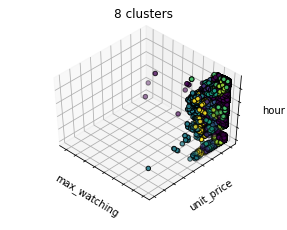

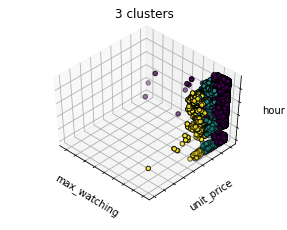

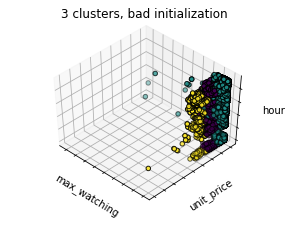

In [100]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['max_watching'],X['unit_price'], X['hour'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('max_watching')
    ax.set_ylabel('unit_price')
    ax.set_zlabel('hour')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


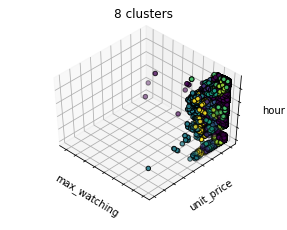

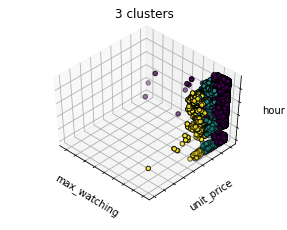

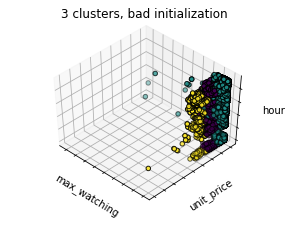

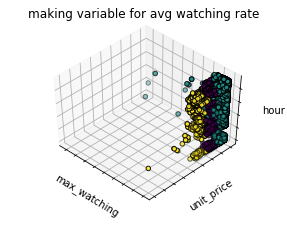

In [101]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['max_watching'],X['unit_price'], X['hour'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('max_watching')
    ax.set_ylabel('unit_price')
    ax.set_zlabel('hour')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#for name, label in [('0', 0),
#                    ('1', 1),
#                    ('2', 2)]:
#    ax.text3D(X[y == label, 3].mean(),
#              X[y == label, 0].mean(),
#              X[y == label, 2].mean() + 2, name,
#              horizontalalignment='center',
#              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X['max_watching'],X['unit_price'], X['hour'], c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('max_watching')
ax.set_ylabel('unit_price')
ax.set_zlabel('hour')
ax.set_title('making variable for avg watching rate')
ax.dist = 12

fig.show()

In [102]:
labels = est.labels_

labels

for i in labels:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
2
2
0
2
0
2
0
2
2
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
0
2
0
0
0
2
2
0
2
2
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
0
2
2
2
2
2
0
0
2
0
2
2
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
0
0
2
2
2
2
2
2
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
2
2
2
2
0
2
0
2
2
0
0
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
0
2
2
0
2
2
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


0
0
2
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
2
2
2
2
0
2
0
0
2
0
0
2
2
2
2
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
0
0
2
0
2
2
0
2
2
0
2
0
2
2
2
0
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
2
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
2
2
2
2
0
0
0
2
2
2
2
0
2
0
2
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
0
0
2
0
2
2
2
0
0
2
2
2
0
0
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
2
0
2
1
0
2
0
2
1
0
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
0
0
1
0
0
2
2
2
0
1
0
0
0
2
2
0
2
0
2
0
0
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
2
0
0
2
2
0
0
2
0
0
0
2
2
2
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
2
2
0
0
0
2
0
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
2
0
1
0
0
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
2
0
1
1
2
2
2
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
0
0
1
1
1
0
0
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
2
0
2
0
0
0
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
2
0
0
0
0
2
0
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


### 1. max_watching(norm), hour, product_category(one_hot_encoding)
### 2. max_watching(norm), hour, Rain_seoul(one_hot_encoding) Choose

In [103]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

max_watching_norm = min_max_scaler.fit_transform(df["max_watching"].values.reshape(-1, 1))

In [104]:
max_watching_norm.reshape(1,-1)

array([[0.        , 0.        , 0.        , ..., 0.04679803, 0.04679803,
        0.04679803]])

In [105]:
len(max_watching_norm)

35375

In [106]:
df["max_watching_norm"] = max_watching_norm.ravel()

In [107]:
max_watching_norm.max()

0.9999999999999999

In [108]:
data = {
    'max_watching':df["max_watching_norm"],
    'rain_seoul':df['rain_seoul'].values,
    'hour': df["hour"].values
}

In [109]:
df_Clustering_2 = pd.DataFrame(data)

In [110]:
df_Clustering_2

,max_watching,rain_seoul,hour
0,0.000000,0.0,6
1,0.000000,0.0,6
2,0.000000,0.0,6
3,0.000000,0.0,6
4,0.000000,0.0,6
5,0.000000,0.0,6
6,0.000000,0.0,7
7,0.000000,0.0,7
8,0.000000,0.0,7
9,0.000000,0.0,8


In [111]:
X_2 = df_Clustering_2

In [113]:
X_2['hour'] = pd.to_numeric(X_2.hour, errors = 'coerce')

In [114]:
X_2

,max_watching,rain_seoul,hour
0,0.000000,0.0,6
1,0.000000,0.0,6
2,0.000000,0.0,6
3,0.000000,0.0,6
4,0.000000,0.0,6
5,0.000000,0.0,6
6,0.000000,0.0,7
7,0.000000,0.0,7
8,0.000000,0.0,7
9,0.000000,0.0,8


35375
35375
35375


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


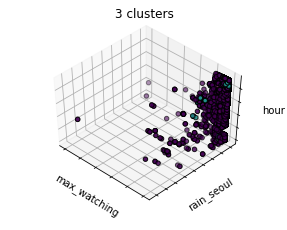

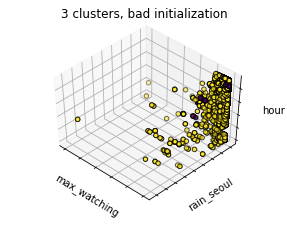

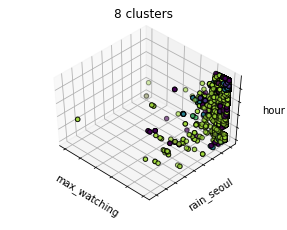

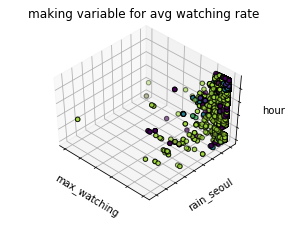

In [117]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

estimators = [('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random')),
              ('k_means_iris_8', KMeans(n_clusters=8))]

fignum = 1
titles = ['3 clusters', '3 clusters, bad initialization', '8 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print(len(labels))
    ax.scatter(X_2['max_watching'],X_2['rain_seoul'], X_2['hour'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('max_watching')
    ax.set_ylabel('rain_seoul')
    ax.set_zlabel('hour')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#for name, label in [('0', 0),
#                    ('1', 1),
#                    ('2', 2)]:
#    ax.text3D(X[y == label, 3].mean(),
#              X[y == label, 0].mean(),
#              X[y == label, 2].mean() + 2, name,
#              horizontalalignment='center',
#              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_2['max_watching'],X_2['rain_seoul'], X_2['hour'], c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('max_watching')
ax.set_ylabel('rain_seoul')
ax.set_zlabel('hour')
ax.set_title('making variable for avg watching rate')
ax.dist = 12

fig.show()

In [118]:
labels = est.labels_

labels

for i in labels:
    print(i)

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
3
3
3
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
1
1
1
1
1
1
4
7
1
7
1
4
1
4
7
2
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
2
2
1
7
1
1
1
4
2
1
7
2
1
4
6
6
6
6
6
6
6
6
6
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
0
0
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
7
1
4
4
7
2
2
1
1
4
1
7
2
2
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3


1
3
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
3
3
3
3
3
3
4
1
1
7
7
2
2
4
1
1
2
2
1
1
4
7
1
1
1
1
1
1
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
1
1
5
5
1
1
1
5
5
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
0
0
6
6
0
0
0
6
6
6
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0


4
1
7
1
1
4
2
2
2
4
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
6
6
0
6
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
1
1
1
1
1
1
4
5
5
5
2
4
4
5
4
2
5
4
5
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
3
3
3
0
6
0
6
6
0
6
6
6
6
6
6
3
0
3
0
3
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
2
4
4
1
4
2
2
2
1
4
1
2
4
2
1
4
6
6
6
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
5
5
2
4
4
5
5
2
4
5
5
4
3
3
3
3
3
3
3
3
3
1
1
1
1
1
1
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
0
0
0
0
6
6
6
6
6
6
6
6
6
0
0
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
4
2
4
1
2
4
4
1
2
1
4
7
1
4
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
7
7
4
7
7
4
4
7
7
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
4
4
7
7
7
4
4
7
3
1
5
5
3
5
3
5
5
3
5
1
1
3
5
1
5
5
1
1
5
5
5
5
5
1
1
5
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
6
0
0
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
6
6
6
6
6
6
6
6
6
7
7
7
7
4
4
7
4
7
4
3
1
5
1
5
1
5
1
3
5
3
1
1
5
3
5
3
4
2
7
1
1
4
4
1
4
1
2
4
2
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
1
1
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6


6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
1
1
1
0
0
6
0
6
0
0
0
6
6
6
6
0
6
0
6
6
6
6
0
6
6
0
0
0
0
0
0
6
6
6
1
0
1
1
5
5
1
1
1
0
1
5
5
5
1
6
6
6
6
0
0
6
6
0
1
1
1
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
1
2
4
7
4
4
1
1
2
1
1
4
4
2
2
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
4
1
4
1
1
4
2
2
4
0
0
0
0
0
0
6
6
6
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
1
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
6
0
0
0
6
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
1
5
1
0
0
5
1
1
1
1
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
0
6
6
0
6
0
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
6
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
3
3
3
4
4
4
4
1
1
4
4
1
4
4
7
2
1
4
2
1
2
1
4
1
1
1
6
6
6
6
6
6
6
6


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
2
3
7
5
1
3
2
4
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
2
4
4
1
2
4
4
1
1
2
2
4
1
4
1
2
6
6
6
6
6
6
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
5
4
1
1
4
3
1
3
5
4
1
1
4
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
1
1
1
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
1
4
1
1
4
2
2


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
7
4
1
5
5
2
5
1
5
7
5
7
4
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
3
3
3
6
6
6
6
0
0
0
6
6
6
3
3
3
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
6
0
0
0
0
0
0
0
0
6
0
6
0
0
0
0
0
6
6
6
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
0
0
0
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
6
6
6
6
6
6


In [119]:
df["Rain_seoul_hour_clustering_labels"] = labels

In [120]:
df["Rain_seoul_hour_clustering_labels"]

0        6
1        6
2        6
3        6
4        6
5        6
6        6
7        6
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
17       6
18       6
19       6
20       6
21       6
22       6
23       6
24       6
25       6
26       6
27       6
28       6
29       6
        ..
35345    3
35346    3
35347    3
35348    3
35349    0
35350    3
35351    0
35352    3
35353    0
35354    3
35355    0
35356    3
35357    0
35358    3
35359    3
35360    0
35361    1
35362    1
35363    1
35364    1
35365    1
35366    1
35367    0
35368    0
35369    0
35370    0
35371    0
35372    0
35373    0
35374    0
Name: Rain_seoul_hour_clustering_labels, Length: 35375, dtype: int32

In [121]:
df

,broadcast_time,product_category,unit_price,handling_amount,off_day,time,weekday,hour,temperature_seoul,rain_seoul,...,week_dup,max_watching,avg_watching,working_time,buy_count,pastBuyer_count_mean,unit_price_class,product_category_mod,max_watching_norm,Rain_seoul_hour_clustering_labels
0,20.0,의류,39900,2099000.0,True,06:00:00,1,6,-7.9,0.0,...,1.0,0.000,0.000000,False,52.606516,NaN,3.0,6,0.000000,6
1,20.0,의류,39900,4371000.0,True,06:00:00,1,6,-7.9,0.0,...,1.0,0.000,0.000000,False,109.548872,NaN,3.0,6,0.000000,6
2,20.0,의류,39900,6955000.0,True,06:20:00,1,6,-7.9,0.0,...,2.0,0.000,0.000000,False,174.310777,109.548872,3.0,6,0.000000,6
3,20.0,의류,39900,3262000.0,True,06:20:00,1,6,-7.9,0.0,...,2.0,0.000,0.000000,False,81.754386,52.606516,3.0,6,0.000000,6
4,20.0,의류,39900,9337000.0,True,06:40:00,1,6,-7.9,0.0,...,3.0,0.000,0.000000,False,234.010025,141.929825,3.0,6,0.000000,6
5,20.0,의류,39900,6672000.0,True,06:40:00,1,6,-7.9,0.0,...,3.0,0.000,0.000000,False,167.218045,67.180451,3.0,6,0.000000,6
6,20.0,속옷,59000,6819000.0,True,07:00:00,1,7,-7.7,0.0,...,1.0,0.000,0.000000,False,115.576271,NaN,6.0,5,0.000000,6
7,20.0,속옷,59000,15689000.0,True,07:20:00,1,7,-7.7,0.0,...,2.0,0.000,0.000000,False,265.915254,115.576271,6.0,5,0.000000,6
8,20.0,속옷,59000,25370000.0,True,07:40:00,1,7,-7.7,0.0,...,3.0,0.000,0.000000,False,430.000000,190.745763,6.0,5,0.000000,6
9,20.0,의류,59900,16133000.0,True,08:00:00,1,8,-7.7,0.0,...,1.0,0.000,0.000000,False,269.332220,NaN,7.0,6,0.000000,6


In [124]:
df.to_csv("./Rain_seoul_hour_clustering_labels_max_norm_8_clusters.csv")